Reference: https://towardsdatascience.com/finding-shortest-path-using-q-learning-algorithm-1c1f39e89505

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import pandas as pd
%matplotlib inline

In [2]:
def initialize_graph():
  edges = [(0,4), (4,0), (0,3),(3,0),(1,2),(2,1),(1,4),(4,1),(1,8),(8,1),(1,9),(9,1),(2,3),(3,2),(2,6),(6,2),(1,5),(5,1),(2,5), (5,2),(5,6),(6,5),(7,8),(8,7),(7,5),(5,7),(8,9),(9,8),(8,10),(10,8),(9,10),(10,9)]
  g = nx.Graph()
  g.add_edges_from(edges)
  pos = nx.spring_layout(g)
  nx.draw_networkx_nodes(g,pos)
  nx.draw_networkx_edges(g,pos)
  nx.draw_networkx_labels(g,pos)
  plt.show()
  return g


In [3]:
# Intitialize Reward Matrix
def init_reward_matrix():
  r = np.matrix(np.zeros(shape = (11,11)))
  for x in g[10]:
    r[x,10] = 100
  pd.DataFrame(r)
  return r

In [4]:
#Initialize Q Matrix
def init_q_matrix():
  q = np.matrix(np.zeros(shape = (11,11)))
  q-=100
  for node in g.nodes:
    for x in g[node]:
      q[node,x]=0
      q[x,node]=0
  pd.DataFrame(q)
  return q
  

In [5]:
def next_number(start,er):
  random_value = random.uniform(0,1)
  if random_value < er:
    sample= g[start]
  else:
    sample = np.where(q[start,] == np.max(q[start]))[1]
  next_node = int(np.random.choice(sample,1))
  return next_node


In [6]:
def updateQ(node1,node2,lr,discount):
  max_index = np.where(q[node2,]==np.max(q[node2,]))[1]
  if max_index.shape[0]>1:
    max_index = int(np.random.choice(max_index, size = 1))
  else:
    max_index = int(max_index)
  max_value = q[node2,max_index]
  q[node1,node2] = int((1-lr)*q[node1,node2]+lr*(r[node1,node2]+discount*max_value))
  

In [7]:
def learn(er,lr,discount):
  for i in range(50000):
    start = np.random.randint(0,11)
    next_node = next_number(start,er)
    updateQ(start,next_node,lr,discount)


In [8]:
def shortest_path(begin, end):
  path = [begin]
  next_node = np.argmax(q[begin,])
  path.append(next_node)
  while next_node != end:
    next_node = np.argmax(q[next_node,])
    path.append(next_node)
  return path

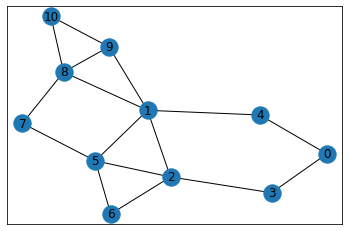

In [9]:
g = initialize_graph()

In [10]:
r = init_reward_matrix()

In [11]:
q = init_q_matrix()

In [12]:
learn(0.5,0.8,0.8)
pd.DataFrame(q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,110.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,138.0,-100.0,138.0,138.0,-100.0,-100.0,218.0,218.0,-100.0
2,-100.0,174.0,-100.0,110.0,-100.0,138.0,110.0,-100.0,-100.0,-100.0,-100.0
3,110.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,110.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,174.0,138.0,-100.0,-100.0,-100.0,110.0,174.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,138.0,-100.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,138.0,-100.0,-100.0,218.0,-100.0,-100.0
8,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,174.0,-100.0,218.0,274.0
9,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,218.0,-100.0,274.0


In [13]:
shortest_path(0,10)

[0, 4, 1, 8, 10]

In [14]:
shortest_path(2,10)

[2, 1, 8, 10]

In [15]:
shortest_path(3,10)

[3, 2, 1, 8, 10]

In [16]:
shortest_path(1, 10)

[1, 8, 10]

In [17]:
shortest_path(4, 10)

[4, 1, 8, 10]

#Update Matrix

In [19]:
def update_matrix(n, g, q):
  for node in g.nodes:
    for x in g[n]:
      q[node,x]=-200
      q[x,node]=-200
  return g

In [25]:
g = update_matrix(4, g, q)

In [26]:
pd.DataFrame(q)

,0,1,2,3,4,5,6,7,8,9,10
0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
1,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
3,-200.0,-200.0,-200.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,-200.0,-200.0,-200.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-200.0,-200.0,-200.0,-100.0,-100.0,-100.0,110.0,174.0,-100.0,-100.0,-100.0
6,-200.0,-200.0,-200.0,-100.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-200.0,-200.0,-200.0,-100.0,-100.0,138.0,-100.0,-100.0,218.0,-100.0,-100.0
8,-200.0,-200.0,-200.0,-100.0,-100.0,-100.0,-100.0,174.0,-100.0,218.0,274.0
9,-200.0,-200.0,-200.0,-100.0,-100.0,-100.0,-100.0,-100.0,218.0,-100.0,274.0


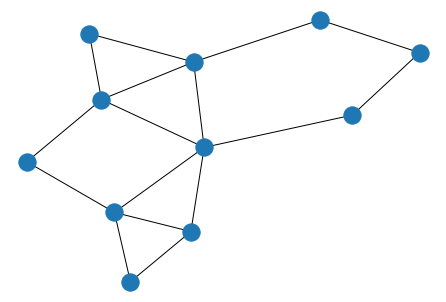

In [23]:
nx.draw(g)
plt.show()

In [24]:
shortest_path(3, 10)

[3, 1, 8, 10]

In [30]:
shortest_path(7, 10)

[7, 8, 10]